In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### TASK 1:->  Import data into Python environment.

In [5]:
df = pd.read_csv(r'C:\Users\Pavan Lande\Downloads\1568699544_comcast_telecom_complaints_data\Comcast_telecom_complaints_data.csv')

In [17]:
print(df.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
date_col                       0
month                          0
day                            0
dtype: int64


In [18]:
df.shape

(2224, 14)

In [6]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### TASK 2:-> Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [13]:
df['date_col']= pd.to_datetime(df['Date_month_year'])
df['month'] = df['date_col'].dt.month
df['day'] = df['date_col'].dt.day

<AxesSubplot:xlabel='month'>

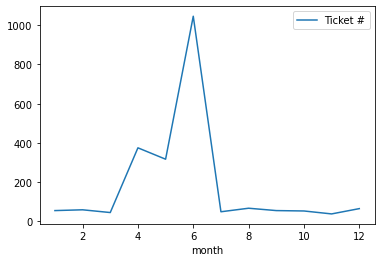

In [14]:
df[['month','Ticket #']].groupby('month').count().plot()

<AxesSubplot:xlabel='day'>

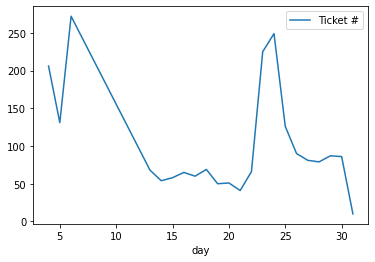

In [15]:
df[['day','Ticket #']].groupby('day').count().plot()

### TASK3:-> Provide a table with the frequency of complaint types.

In [25]:
df['Customer Complaint'].str.lower().value_counts()

comcast                                                            102
comcast data cap                                                    30
comcast internet                                                    29
comcast data caps                                                   21
comcast billing                                                     18
                                                                  ... 
monthly data caps                                                    1
comcast/xfinity poor service, fraudulent billing and collection      1
lost emails/billing                                                  1
improper billing and non resolution of issues                        1
comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

<AxesSubplot:>

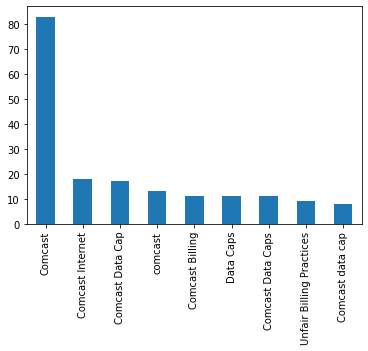

In [34]:
df['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

### Task 4- Which complaint types are maximum i.e. around internet, network issues, or across any other domains..

In [37]:
internet_issues1=df[df['Customer Complaint'].str.contains("network")].count()
internet_issues2=df[df['Customer Complaint'].str.contains("speed")].count()
internet_issues3=df[df['Customer Complaint'].str.contains("data")].count()
internet_issues4=df[df['Customer Complaint'].str.contains("internet")].count()
billing_issues1=df[df['Customer Complaint'].str.contains("bill")].count()
billing_issues2=df[df['Customer Complaint'].str.contains("billing")].count()
billing_issues3=df[df['Customer Complaint'].str.contains("charges")].count()
service_issues1=df[df['Customer Complaint'].str.contains("service")].count()
service_issues2=df[df['Customer Complaint'].str.contains("customer")].count()

In [38]:
total_internet_issues=internet_issues1+internet_issues2+internet_issues3+internet_issues4
print(total_internet_issues)

Ticket #                       374
Customer Complaint             374
Date                           374
Date_month_year                374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
date_col                       374
month                          374
day                            374
new_col                        374
dtype: int64


In [39]:
total_billing_issues=billing_issues1+billing_issues2+billing_issues3
print(total_billing_issues)

Ticket #                       353
Customer Complaint             353
Date                           353
Date_month_year                353
Time                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
date_col                       353
month                          353
day                            353
new_col                        353
dtype: int64


In [40]:
total_service_issues=service_issues1+service_issues2
print(total_service_issues)

Ticket #                       360
Customer Complaint             360
Date                           360
Date_month_year                360
Time                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
date_col                       360
month                          360
day                            360
new_col                        360
dtype: int64


In [41]:
other_issues=2224-(total_internet_issues+total_billing_issues+total_service_issues)
print(other_issues)

Ticket #                       1137
Customer Complaint             1137
Date                           1137
Date_month_year                1137
Time                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
date_col                       1137
month                          1137
day                            1137
new_col                        1137
dtype: int64


### TASK 5 :-> Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [28]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [32]:
df['new_col'] = ['open' if x in ['Open','Pending'] else 'closed' for x in df['Status']]

In [46]:
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_col,month,day,new_col
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,22,closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,4,closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,18,closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,5,open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,26,closed


### Task 5 :->  Which state has the maximum complaints

In [42]:
df.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

### Task 6- Provide state wise status of complaints in a stacked bar chart

In [62]:
df['State'] = df['State'].str.lower() 

In [63]:
df1 = df[['State' , 'new_col','Ticket #']].groupby(['State' , 'new_col']).count().unstack().fillna(0)

In [64]:
df1.columns = [ b for a , b in df1.columns]

In [65]:
df1.columns

Index(['closed', 'open'], dtype='object')

<AxesSubplot:xlabel='State'>

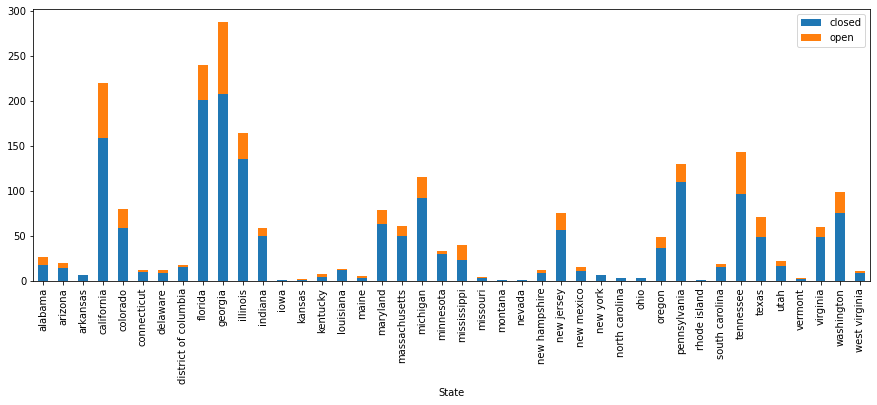

In [61]:
df1.plot(kind = 'bar', stacked = True , figsize = (15,5))

### TASK 7 :->  Which state has the maximum complaints
### Ans:-> As per stacked bar chart "Georgia" has the maximum complaints

### TASK 8 :-> Which state has the highest percentage of unresolved complaints

In [67]:
df1['percent_of_unresolved_columns'] = (df1['closed'] / df1.sum(axis = 1))*100

<AxesSubplot:xlabel='State'>

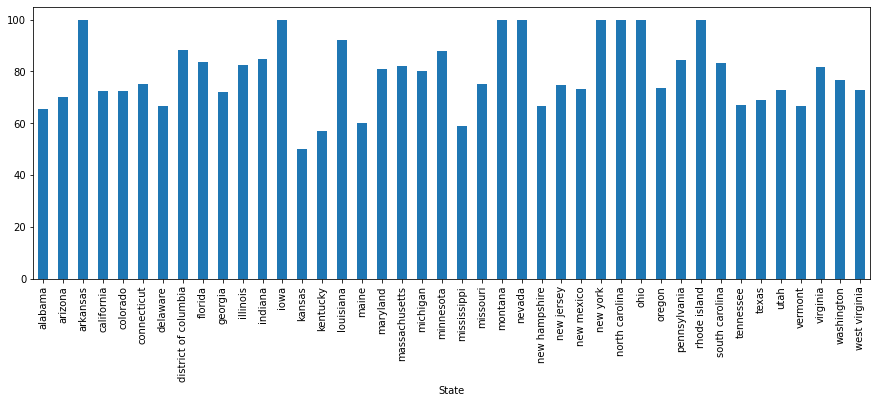

In [81]:
df1['percent_of_unresolved_columns'].plot(kind="bar", figsize=(15,5))

### Task 8- Provide the percentage of complaints resolved till date, which were received through the internet and customer care calls


In [83]:
df['Received Via'] = df['Received Via'].str.lower()

In [84]:
df['Received Via'].unique()

array(['customer care call', 'internet'], dtype=object)

In [88]:
df[df['new_col'] == 'open'].shape[0] / len(df)

0.23246402877697842